In [1]:
import os
import numpy as np
import sys
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf

## load

In [2]:
file_names = os.listdir('./data')
file_names.remove('.ipynb_checkpoints')

In [3]:
data_list = []
for file in file_names:
    load_data, sr = librosa.core.load(os.path.join('./data', file), sr=44100)
    data_list.append(load_data)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.6/dist-packages/librosa/cor

In [6]:
data_list[0].shape

(88200,)

In [9]:
for i in range(len(data_list)):
    try:
        if (data_list[i].shape[0] > 160000) or (data_list[i].shape[0] < 30000): 
            data_list.remove(data_list[i]) #너무큰애는 버리기
    except IndexError:
        print('index error at index {}'.format(i))
    
for i in range(len(data_list)):
    print(data_list[i].shape)

(88200,)
(124909,)
(88200,)
(88200,)
(78542,)
(105182,)
(88200,)
(88200,)
(114874,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(88200,)
(40774,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


### dataset

In [10]:
import time

In [10]:
look_back = 1102
latency = 2205
target_size = 10000

In [11]:
x_list = []
y_list = []
for i in tqdm(range(len(data_list))):
# for i in range(1):
    for j in range(0, 30000, 500):
        x_ = data_list[i][j :look_back+j ]
        mfcc = librosa.feature.mfcc(y = x_, sr=sr)
        y_ = data_list[i][look_back+j+latency : look_back+j+latency+target_size] *100
        y_filled = np.zeros((target_size,))
        y_filled[ : y_.shape[0]] = y_
#         x_list.append(x_)
        x_list.append(mfcc)
        y_list.append(y_filled)

In [12]:
train_x = np.asarray(x_list)
train_y = np.asarray(y_list)

In [96]:
# spectro = librosa.feature.melspectrogram(x_list[0], sr)
# S_dB = librosa.power_to_db(spectro, ref=np.max)

## train

In [17]:
import keras
from keras.layers import *
from keras.models import Model
from keras import *
from keras.layers.advanced_activations import *

Using TensorFlow backend.


In [18]:
# train_x = train_x.reshape((-1, look_back, 1))
train_x.shape

(1050, 20, 2)

In [20]:
# n_target = train_y.shape[1]

# model = Sequential()
# model.add(LSTM(32, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
# model.add(Activation(LeakyReLU()))
# model.add(LSTM(32, return_sequences=False))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Activation(LeakyReLU()))
# # model.add(Dense(10000, activation = LeakyReLU()) )
# model.add(Dense(n_target) )

# model_gpu = keras.utils.multi_gpu_model(model, gpus=2)
# model_gpu.compile(loss="mean_squared_error", optimizer='adadelta')
# # for i in range(10):
# model_gpu.fit(train_x,  train_y.reshape((-1,n_target)),batch_size=128, epochs=50, shuffle=True)

# #     model.save('./models/GRU{}_m2m_unit32_var90_bs128_adadelta_lb5.h5'.format(i))

Epoch 1/50
1050/1050 [==============================] - 4s 4ms/step - loss: 99.2467
Epoch 2/50
1050/1050 [==============================] - 1s 701us/step - loss: 99.0022
Epoch 3/50
1050/1050 [==============================] - 1s 685us/step - loss: 98.4176
Epoch 4/50
1050/1050 [==============================] - 1s 693us/step - loss: 97.4294
Epoch 5/50
1050/1050 [==============================] - 1s 709us/step - loss: 96.2152
Epoch 6/50
1050/1050 [==============================] - 1s 679us/step - loss: 94.1800
Epoch 7/50
1050/1050 [==============================] - 1s 686us/step - loss: 92.4021
Epoch 8/50
1050/1050 [==============================] - 1s 681us/step - loss: 88.8211
Epoch 9/50
1050/1050 [==============================] - 1s 681us/step - loss: 86.0962
Epoch 10/50
1050/1050 [==============================] - 1s 683us/step - loss: 81.2143
Epoch 11/50
1050/1050 [==============================] - 1s 691us/step - loss: 77.1755
Epoch 12/50
1050/1050 [==============================]

In [29]:
# n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
# filters = 32
# kernel_size = 5
# input_layer = Input(shape=(n_timesteps, n_features))

# # Attention Layer
# attention_probs = layers.Dense(n_features, activation='softmax')(input_layer)
# attention_res = layers.multiply([input_layer, attention_probs])

# cnn_layer = Conv1D(filters , kernel_size, padding='same')(attention_res)
# cnn_layer = LeakyReLU()(cnn_layer)
# cnn_layer = Conv1D(filters , kernel_size, padding='same')(cnn_layer)
# cnn_layer = LeakyReLU()(cnn_layer)
# cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
# cnn_layer = Conv1D(filters , kernel_size, padding='same')(cnn_layer)
# cnn_layer = LeakyReLU()(cnn_layer)
# cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
# cnn_layer = Conv1D(filters , kernel_size, padding='same')(cnn_layer)
# cnn_layer = LeakyReLU()(cnn_layer)
# cnn_layer = MaxPooling1D(pool_size=2)(cnn_layer)
# cnn_layer = Flatten()(cnn_layer)
# cnn_layer = Dense(32 )(cnn_layer)
# cnn_lyaer = LeakyReLU()(cnn_layer)
# cnn_layer = BatchNormalization()(cnn_layer)
# cnn_layer = Dropout(0.2)(cnn_layer)

# gru_layer = LSTM(32, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True)(attention_res)
# gru_layer = LSTM(32, return_sequences=True)(gru_layer)
# gru_layer = LSTM(32, return_sequences=True)(gru_layer)
# gru_layer = LSTM(32, return_sequences=True)(gru_layer)
# gru_layer = LSTM(32, return_sequences=False)(gru_layer)
# gru_layer = Dense(32, activation='relu')(gru_layer)
# gru_layer = BatchNormalization()(gru_layer)
# gru_layer = Dropout(0.2)(gru_layer)

# merge_layer = concatenate([gru_layer, cnn_layer])
# output = Dense(n_outputs)(merge_layer)
# output = BatchNormalization()(output)
# # output = Activation('sigmoid')(output)

# model = Model(inputs = input_layer, outputs = output )
# model_gpu = keras.utils.multi_gpu_model(model, gpus=2)
# model_gpu.compile(optimizer = 'adadelta', loss= 'mse')

In [30]:
model_gpu.fit(train_x,  train_y.reshape((-1,n_outputs)),batch_size=128, epochs=100, shuffle=True)

Epoch 1/100
1140/1140 [==============================] - 12s 10ms/step - loss: 38.8614
Epoch 2/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.7381
Epoch 3/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.6779
Epoch 4/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.6276
Epoch 5/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.5313
Epoch 6/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.4380
Epoch 7/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.3624
Epoch 8/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.2451
Epoch 9/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.1460
Epoch 10/100
1140/1140 [==============================] - 2s 1ms/step - loss: 38.0408
Epoch 11/100
1140/1140 [==============================] - 2s 1ms/step - loss: 37.9370
Epoch 12/100
1140/1140 [==============================] - 2s 

1140/1140 [==============================] - 2s 1ms/step - loss: 33.8342
Epoch 97/100
1140/1140 [==============================] - 2s 1ms/step - loss: 33.8849
Epoch 98/100
1140/1140 [==============================] - 2s 1ms/step - loss: 33.9130
Epoch 99/100
1140/1140 [==============================] - 2s 1ms/step - loss: 33.7722
Epoch 100/100
1140/1140 [==============================] - 2s 1ms/step - loss: 33.7999


In [62]:
# model_gpu = keras.utils.multi_gpu_model(model, gpus=2)
# model_gpu.compile(loss="mean_squared_error", optimizer='adam')
for i in range(2000):
    history = model_gpu.fit(train_x,  train_y.reshape((-1,n_outputs)),batch_size=128, epochs=1, shuffle=True, verbose=0)
    if i % 1000==0:
        print('{}th iteration, loss : {}'.format(i,history.history['loss']))

0th iteration, loss : [23.507058923286305]
1000th iteration, loss : [23.46006387409411]


### darknet53 

In [27]:
def darknet53_residual_block(inputs, filters, training, data_format, strides=1):
    
    shortcut = inputs
    inputs = tf.layers.conv1d(inputs = inputs, filters = filters, kernel_size = 1, strides = strides, padding='same')
#     inputs = Conv1D(filters = filters, kernel_size=1, strides=strides, padding='same')(inputs)
    inputs = tf.layers.batch_normalization(inputs)
    inputs = tf.nn.leaky_relu(inputs)

    inputs = tf.layers.conv1d(inputs = inputs, filters = 2*filters, kernel_size = 3, strides = strides, padding='same')
    inputs = tf.layers.batch_normalization(inputs)
    inputs = tf.nn.leaky_relu(inputs)
    
    inputs += shortcut
    
    return inputs

def darknet53(inputs, y_true, training, data_format):
    # 다크넷 53을 통해 특징 추출하기

    inputs = tf.layers.conv1d(inputs = inputs, filters = 8, kernel_size = 3, strides = 1, padding='same')
    inputs = tf.layers.batch_normalization(inputs)
    inputs = tf.nn.leaky_relu(inputs)

    inputs = tf.layers.conv1d(inputs = inputs, filters = 16, kernel_size = 3, strides = 2, padding='same')
    inputs = tf.layers.batch_normalization(inputs)
    inputs = tf.nn.leaky_relu(inputs)

    inputs = darknet53_residual_block(inputs, filters=8, training=training, data_format=data_format)

    
    inputs = tf.layers.conv1d(inputs = inputs, filters = 32, kernel_size = 3, strides = 2, padding='same')
    inputs = tf.layers.batch_normalization(inputs)
    inputs = tf.nn.leaky_relu(inputs)

    for _ in range(2):
        inputs = darknet53_residual_block(inputs, filters=16, training=training, data_format= data_format)


    inputs = tf.layers.conv1d(inputs = inputs, filters = 64, kernel_size = 3, strides = 2, padding='same')
    inputs = tf.layers.batch_normalization(inputs)
    inputs = tf.nn.leaky_relu(inputs)

    for _ in range(8):
        inputs = darknet53_residual_block(inputs, filters=32, training=training, data_format=data_format)

    route1 = inputs

    inputs = tf.layers.conv1d(inputs = inputs, filters = 128, kernel_size = 3, strides = 1, padding='same')
    inputs = tf.layers.batch_normalization(inputs)
    inputs = tf.nn.leaky_relu(inputs)

    for _ in range(8):
        inputs = darknet53_residual_block(inputs, filters=64, training=training, data_format= data_format)

    route2 = inputs

    inputs = tf.layers.conv1d(inputs = inputs, filters = 256, kernel_size = 3, strides = 1, padding='same')
    inputs = tf.layers.batch_normalization(inputs)
    inputs = tf.nn.leaky_relu(inputs)

    for _ in range(4):
        inputs = darknet53_residual_block(inputs, filters=128, training=training, data_format= data_format)

    inputs = tf.concat([route1, route2, inputs], axis=-1)
#     print(route1, route2, inputs)
    inputs = tf.reshape(inputs, shape=(-1, inputs.shape[1] * inputs.shape[2]))
    output = tf.compat.v1.layers.dense(inputs, units=10000)

    loss = tf.losses.mean_squared_error(y_true, output)
    optimizer = tf.train.AdadeltaOptimizer()
    train = optimizer.minimize(loss)
    
    return output, loss ,train

In [32]:
inputs = tf.placeholder(tf.float32, shape = [None , train_x.shape[1], train_x.shape[2]])
y_true = tf.placeholder(tf.float32, shape=[None, train_y.shape[1]])
yhat, loss, train = darknet53(inputs, y_true, training= True, data_format=True)

In [46]:
batch_size =128
# with tf.Session() as sess:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
n_iter = train_x.shape[0]//batch_size
for i in range(1000):
    for batch in range(n_iter+1):
        if batch == n_iter:
            _ = sess.run([train], feed_dict={inputs : train_x[batch_size * batch :] , 
                                             y_true : train_y[batch_size * batch :]})                
        else:
            _ = sess.run([train], feed_dict={inputs : train_x[batch_size * batch : batch_size * (batch+1)] , 
                                             y_true : train_y[batch_size * batch : batch_size * (batch+1)]})
    if i %100 ==0:
        random_idx = np.random.choice(range(n_iter),size=1)[0]
        print(sess.run([loss], feed_dict={inputs : train_x[random_idx * batch_size : (random_idx+1) * batch_size],
                                           y_true : train_y[random_idx * batch_size : (random_idx+1) * batch_size]}))

[563.9899]
[117.16771]
[33.869446]
[34.583424]
[67.03448]
[22.209501]
[30.317041]
[53.437256]
[19.19823]
[53.247795]


In [63]:
for i in range(4000):
    for batch in range(n_iter+1):
        if batch == n_iter:
            _ = sess.run([train], feed_dict={inputs : train_x[batch_size * batch :] , 
                                             y_true : train_y[batch_size * batch :]})                
        else:
            _ = sess.run([train], feed_dict={inputs : train_x[batch_size * batch : batch_size * (batch+1)] , 
                                             y_true : train_y[batch_size * batch : batch_size * (batch+1)]})
    if i %100 ==0:
        random_idx = np.random.choice(range(n_iter),size=1)[0]
        print(sess.run([loss], feed_dict={inputs : train_x[random_idx * batch_size : (random_idx+1) * batch_size],
                                           y_true : train_y[random_idx * batch_size : (random_idx+1) * batch_size]}))

[15.782116]
[33.547104]
[15.776874]
[52.682877]
[33.527317]
[33.520973]
[21.69803]
[15.766019]
[21.691126]
[18.891125]
[21.684566]
[66.02061]
[33.478127]
[33.472164]
[66.006065]
[33.460274]
[33.454273]
[33.448223]
[33.44217]
[33.43603]
[15.746897]
[18.88878]
[18.889116]
[33.410683]
[33.40425]
[30.02595]
[21.638481]
[33.384735]
[52.249043]
[30.022434]
[52.194286]
[36.125282]
[15.734456]
[52.104053]
[30.017965]
[52.036133]
[21.614822]
[36.11218]
[21.61059]
[21.608538]


-----------

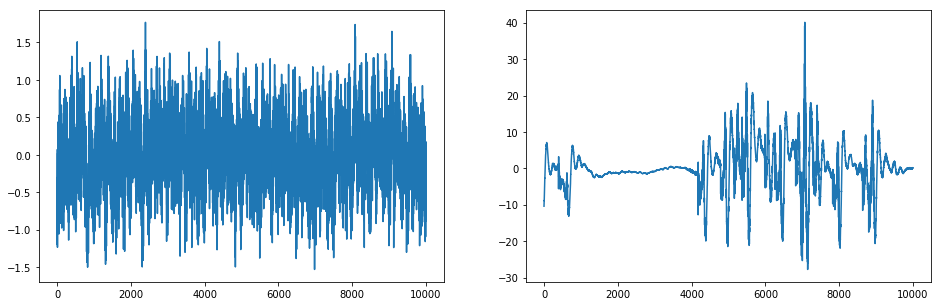

In [70]:
import time
test_index = 500
# with tf.Session() as sess:
y_hat = sess.run(yhat, feed_dict={inputs : np.reshape(train_x[test_index], (-1,20,3))})
# start = time.time()
# yhat = model.predict(train_x[index].reshape((-1,20, 3)))
# print(time.time() - start)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1,2,1)
# plt.plot(train_x[0], label ='ogirinal_phase')
ax1.plot(y_hat[0])
# plt.plot(data_list[0])
ax2 = fig.add_subplot(1,2,2)
ax2.plot(train_y[test_index])


In [34]:
from keras.models import load_model

In [30]:
model_gpu.save('./models/lookback1k_ts10k.h5')
# model_gpu.save_weights('./models/lb1k_ts10k_weights')

In [35]:
#input 
print([node.op.name for node in model.inputs])
#output 
print([node.op.name for node in model.outputs])

['input_9']
['batch_normalization_27/cond/Merge']
